<a href="https://colab.research.google.com/github/SuhyeonHa/MatrixComputation/blob/master/Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression for a binary classification with a regularization

#### 1. Training Data

- load the training data file ('data-nonlinear.txt')
- each row $\{ (x^{(i)}, y^{(i)}, l^{(i)}) \}$ of the data consists of a 2-dimensional point $(x, y)$ with its label $l$
- $x, y \in \mathbb{R}$ and $l \in \{0, 1\}$

#### 2. Logistic regression with a high dimensional feature function

- $\hat{h} = \sigma(z)$ 
- $z = g(x, y; \theta)$, where $g$ is a high dimensional function and $\theta \in \mathbb{R}^{100}$
- $\theta = (\theta_{0,0}, \theta_{0,1}, \cdots, \theta_{9,9})$
- $g(x, y ; \theta) = \sum_{i=0}^{9} \sum_{j=0}^{9} \theta_{i,j} x^{i} y^{j}$
- $\sigma(z) = \frac{1}{1 + \exp(-z)}$
- $\sigma^{\prime}(z) = \sigma(z) (1 - \sigma(z))$

#### 3. Objective Function with a regularization term

- $J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ - l^{(i)} \log(\sigma(g(x^{(i)}, y^{(i)}; \theta))) - (1 - l^{(i)}) \log(1 - \sigma(g(x^{(i)}, y^{(i)}; \theta))) \right] + \frac{\lambda}{2} \sum_{i=0}^{9} \sum_{j=0}^{9} \theta_{i,j}^2$
- the degree of regularization is determined by the control parameter $\lambda$
- the larger value of $\lambda$ yields smoother classification boundary

#### 4. Gradient Descent

- $\theta_{i, j}^{(t+1)} := \theta_{i, j}^{(t)} - \alpha \left[ \frac{1}{m} \sum_{i=1}^{m} (\sigma(g(x^{(i)}, y^{(i)}; \theta^{(t)})) - l^{(i)}) \frac{\partial g(x^{(i)}, y^{(i)}; \theta^{(t)})}{\partial \theta_{i, j}} + \lambda \theta_{i, j}^{(t)} \right]$, for all $i, j$
- you should choose a learning rate $\alpha$ in such a way that the convergence is achieved
- you can use initial conditions $\theta_{i, j}^{(0)}$ for all $i, j$ to achieve the best accuracy
 
#### 5. Training

- find optimal parameters $\theta$ using the training data with varying values of the regularization parameter $\lambda$

#### 6. Compute the training accuracy

- the accuracy is computed by $\frac{\textrm{number of correct predictions}}{\textrm{total number of predictions}}$
- compute the accuracy with varying values of the regularization parameter $\lambda$

## Maching Learning Lecture

https://www.youtube.com/playlist?list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN

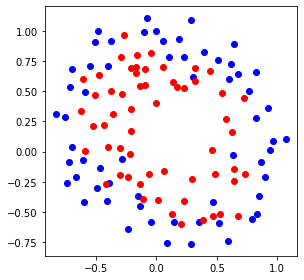

In [1]:
import numpy as np
from matplotlib import pyplot as plt

data_path = '/content/drive/My Drive/Colab Notebooks/MatrixComputation/data-nonlinear-07.txt'
data    = np.genfromtxt(data_path, delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [0]:
def normalize_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X-mean) / std

pointX = normalize_data(pointX)
pointY = normalize_data(pointY)

In [0]:
SIZE_DATA = len(pointX)
print(f'SIZE_DATA {SIZE_DATA}')
print(f'x.shape {pointX.shape}')
print(f'y.shape {pointY.shape}')
print(f'label.shape {label.shape}')

SIZE_DATA 118
x.shape (118,)
y.shape (118,)
label.shape (118,)


I defined $g(x, y ; \theta)$ and $f_{k-1}(x, y)$ as below.
- $g(x, y ; \theta) = \theta_{0} f_{0}(x, y) + \theta_{1} f_{1}(x, y) + \cdots + \theta_{k-1} f_{k-1}(x, y)$
- $f_{0}(x, y)=1$
- $f_{1}(x, y)=x^{2}$
- $f_{2}(x, y)=y^{2}$

In [0]:
def pred_sigma(z):
  temp = 1 + np.exp(-z)
  return 1./temp

In [0]:
def pred_z(theta, x, y):
  return theta[0]+theta[1]*(x**2)+theta[2]*(y**2)

In [0]:
def objFunc(sigma, label, num):
  term1 = -label*np.log(sigma)
  term2 = (1-label)*np.log(1-sigma)
  result = np.mean(term1-term2)
  return result

In [0]:
def accuracy(pred_label, label):
  count = 0
  num = len(pred_label)
  for i in range(num):
    if pred_label[i]==label[i]:
      count = count+1
  return count/num

In [0]:
def sigma2label(sigma):
  pred_label = np.empty_like(sigma)
  for i in range(len(sigma)):
    if sigma[i] > 0.5:
      pred_label[i] = 1
    else:
      pred_label[i] = 0
  return pred_label

In [0]:
# Logistic regression #

In [0]:
# hyper parameters #
num_k = 3
theta = np.full(num_k, 1, dtype=float) # initiate every theta as zero
grad = np.full(num_k, 0, dtype=float)
itr = 100000 # step_size
lr = 1e-2 # learning_rate

cost_list = []
theta_list = []
accuracy_list = []

In [0]:
for i in range(itr): # gradient descent
  z = pred_z(theta, pointX, pointY)
  sigma = pred_sigma(z)
  cost_prev = objFunc(sigma, label, SIZE_DATA) 
  # print(cost_prev)

  # check accuracy
  pred_label = sigma2label(sigma)
  accr = accuracy(pred_label, label)
  accuracy_list.append(accr)

  cost_list.append(cost_prev)
  theta_list.append(theta)

  grad[0] = np.mean(sigma - label)
  temp1 = (pointX**2)+theta[1]*2*pointX
  grad[1] = np.mean((sigma - label)*temp1)
  temp2 = (pointY**2)+theta[2]*2*pointY
  grad[2] = np.mean((sigma - label)*temp2)

  temp = theta - lr*grad

  z = pred_z(temp, pointX, pointY)
  sigma = pred_sigma(z)
  cost_next = objFunc(sigma, label, SIZE_DATA)
  # print(cost_next)

  if(cost_prev < cost_next): # repeat until convergence cost_prev < cost_next
    break
  else:
    theta = temp

final_step = i
final_theta = theta_list[-1]
final_accr = accuracy_list[-1]
print(f'final_step {final_step}')
print(f'final_cost {cost_prev}')
# print(f'cost {cost_list}')
print(f'theta {final_theta}')
print(f'accuracy {final_accr}')

final_step 7444
final_cost 0.4778831036064689
theta [ 2.53830207 -1.7468203  -1.01617517]
accuracy 0.7711864406779662


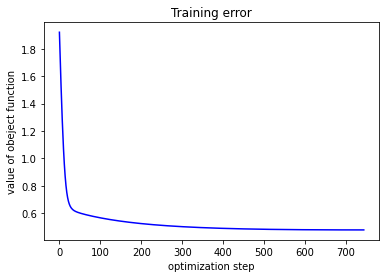

In [0]:
plt.plot(range(final_step+1), cost_list, c='b')
plt.xlabel('optimization step')
plt.ylabel('value of obeject function')
plt.title('Training error')
plt.show()

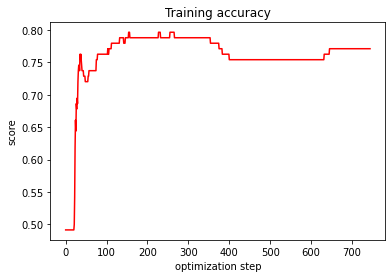

In [0]:
plt.plot(range(final_step+1), accuracy_list, c='r')
plt.xlabel('optimization step')
plt.ylabel('score')
plt.title('Training accuracy')
plt.show()

In [0]:
print('The final training accuracy is {:.1%}'.format(final_accr))

The final training accuracy is 77.1%


In [0]:
x_test = np.arange(-2.0, 2.0, 0.1)
y_test = np.arange(-2.0, 2.0, 0.1)
x_test = normalize_data(x_test)
y_test = normalize_data(y_test)

X, Y = np.meshgrid(x_test, y_test)
test_z = pred_z(final_theta, X, Y)
bound_z = np.empty_like(test_z)
print(bound_z.shape)
for i in range(len(X)):
  for j in range(len(Y)):
      bound_z[i][j] = int(test_z[i][j])
      # if bound_z[i][j] != 0:
      #   bound_z[i][j] = 0.1
print(bound_z)

(40, 40)
[[-5. -4. -4. ... -4. -4. -5.]
 [-5. -4. -4. ... -4. -4. -5.]
 [-4. -4. -3. ... -3. -4. -4.]
 ...
 [-4. -4. -3. ... -3. -4. -4.]
 [-5. -4. -4. ... -4. -4. -5.]
 [-5. -4. -4. ... -4. -4. -5.]]


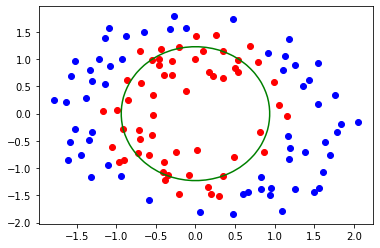

In [0]:
pointX0 = pointX[pred_label == 0]
pointY0 = pointY[pred_label == 0]

pointX1 = pointX[pred_label == 1]
pointY1 = pointY[pred_label == 1]

fig, ax = plt.subplots()
CS = ax.contour(X, Y, test_z, levels=[1.], colors='g')
ax.scatter(pointX0, pointY0, c='b')
ax.scatter(pointX1, pointY1, c='r')